# <div style="font-family: Arial; font-size: 24px; text-align: center;">Volume Forecasing for VirtualCare@UHN</div>


## Information


- **Title:** Volume Forecasting for VirtualCare@UNH
- **Version:** 0.0
- **Date:**  21/09/23
- **Author:**

## Version History

|Version|Descriptions|Date|
|-------|------------|----|
|v0.0|Inception |21/09/23|
|v0.1|ETL       |22/09/23|
|v0.2|EDA       |23/09/23|

## Installation

## Libraries

In [1]:
import sys
from google.colab import drive
import pandas as pd
import numpy as np

import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Data Acquisition

In [2]:
# Acquired from VC@HUN and uploaded to GDrive
drive.mount('/content/gdrive')
PATH = '/content/gdrive/MyDrive/DHDA/2023/DHPO_PLAN/'
sys.path.append(PATH)

Mounted at /content/gdrive


In [3]:
file0 = PATH + 'CLEANED_VC_DATA_0.csv'
df0 = pd.read_csv(file0, parse_dates=['Appt_Start_Time'])

file1 = PATH + 'CLEANED_VC_DATA_1.csv'
df1 = pd.read_csv(file1, parse_dates=['Appt_Start_Time'])

file2 = PATH + 'CLEANED_VC_DATA_2.csv'
df2 = pd.read_csv(file2, parse_dates=['Appt_Start_Time'])

In [4]:
# Summary before merging
print(f'CLEANED_VC_DATA_0: {df0.shape[0]} rows')
print(f'CLEANED_VC_DATA_1: {df1.shape[0]} rows')
print(f'CLEANED_VC_DATA_2: {df2.shape[0]} rows')

CLEANED_VC_DATA_0: 734743 rows
CLEANED_VC_DATA_1: 734743 rows
CLEANED_VC_DATA_2: 734743 rows


## Data Wrangling

### Merge datasets

In [5]:
def merge_dataframes(df0, df1, df2):
    # First merge
    merged_data = pd.merge(df0, df1,
                           on=['Cleaned_Visit_Number', 'Cleaned_patient_id', 'Cleaned_provider_id', 'Appt_Start_Time'],
                           how='outer')

    # Second merge
    merged_data = pd.merge(merged_data, df2,
                           on=['Cleaned_Visit_Number', 'Cleaned_patient_id', 'Cleaned_provider_id', 'Appt_Start_Time'],
                           how='outer')

    return merged_data


In [6]:
merged_data = merge_dataframes(df0, df1, df2)
print(f'Merged Data (after second merge): {merged_data.shape[0]} rows\n')
merged_data.info()


Merged Data (after second merge): 2150366 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150366 entries, 0 to 2150365
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Appt_Start_Time          datetime64[ns]
 1   Appt_Status_x            object        
 2   Appt_Reschedule_Time_x   object        
 3   Appt_Type_x              object        
 4   Care_Modality_x          object        
 5   Cleaned_Visit_Number     int64         
 6   Cleaned_patient_id       int64         
 7   Cleaned_provider_id      float64       
 8   Cleaned_location_name_x  object        
 9   Appt_Status_y            object        
 10  Appt_Reschedule_Time_y   object        
 11  Appt_Type_y              object        
 12  Care_Modality_y          object        
 13  Cleaned_location_name_y  object        
 14  Appt_Status              object        
 15  Appt_Reschedule_Time     object        
 16  Appt_Type               

In [7]:
# Set 'Appt_Start_Time' as the index
merged_data.set_index('Appt_Start_Time', inplace=True)

# Sort the data in ascending order of the index
merged_data.sort_index(inplace=True)

# Find the number of rows before dropping duplicates
rows_before = merged_data.shape[0]

# Drop fully duplicated rows
merged_data.drop_duplicates(inplace=True)

# Find the number of rows after dropping duplicates
rows_after = merged_data.shape[0]

# Calculate and print the number of rows deleted
rows_deleted = rows_before - rows_after
print(f'Number of rows deleted due to duplication: {rows_deleted}')

Number of rows deleted due to duplication: 0


In [8]:
merged_data.head(25)

,Appt_Status_x,Appt_Reschedule_Time_x,Appt_Type_x,Care_Modality_x,Cleaned_Visit_Number,Cleaned_patient_id,Cleaned_provider_id,Cleaned_location_name_x,Appt_Status_y,Appt_Reschedule_Time_y,Appt_Type_y,Care_Modality_y,Cleaned_location_name_y,Appt_Status,Appt_Reschedule_Time,Appt_Type,Care_Modality,Cleaned_location_name
Appt_Start_Time,,,,,,,,,,,,,,,,,,
2022-08-01 04:30:00,Canceled,NaN,OTHER,FACE-TO-FACE,255140,137472,2145.0,Location_205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,226840,20289,1270.0,Location_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244131,14378,1278.0,Location_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244392,48707,1383.0,Location_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,245314,901,1185.0,Location_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,258939,138386,1438.0,Location_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,273756,42384,1384.0,Location_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,273760,80774,1268.0,Location_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,273762,67106,1264.0,Location_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identify duplicated

### Clean data

In [9]:
# Define a function to fill missing values
def fill_missing_values(col_base):
    col_x = f'{col_base}_x'
    col_y = f'{col_base}_y'
    merged_data[col_x] = merged_data[col_x].fillna(merged_data[col_base]).fillna(merged_data[col_y])

# List of column bases to process
col_bases = ['Appt_Status', 'Appt_Reschedule_Time', 'Appt_Type', 'Care_Modality', 'Cleaned_location_name']

# Process each column base
for col_base in col_bases:
    fill_missing_values(col_base)

# Drop the columns with '_y' suffix and without suffix as they are no longer needed
columns_to_drop = [f'{col_base}_y' for col_base in col_bases] + col_bases
merged_data.drop(columns=columns_to_drop, inplace=True)

# Rename the columns with '_x' suffix to remove the suffix
for col_base in col_bases:
    merged_data.rename(columns={f'{col_base}_x': col_base}, inplace=True)


In [10]:
merged_data.head(25)

,Appt_Status,Appt_Reschedule_Time,Appt_Type,Care_Modality,Cleaned_Visit_Number,Cleaned_patient_id,Cleaned_provider_id,Cleaned_location_name
Appt_Start_Time,,,,,,,,
2022-08-01 04:30:00,Canceled,NaN,OTHER,FACE-TO-FACE,255140,137472,2145.0,Location_205
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,226840,20289,1270.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244131,14378,1278.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244392,48707,1383.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,245314,901,1185.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,258939,138386,1438.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,273756,42384,1384.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,273760,80774,1268.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,273762,67106,1264.0,Location_209


In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2150366 entries, 2022-08-01 04:30:00 to 2023-08-31 22:15:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Appt_Status            object 
 1   Appt_Reschedule_Time   object 
 2   Appt_Type              object 
 3   Care_Modality          object 
 4   Cleaned_Visit_Number   int64  
 5   Cleaned_patient_id     int64  
 6   Cleaned_provider_id    float64
 7   Cleaned_location_name  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 147.7+ MB


## Exporting Merged Dataset

In [12]:
# file_path = PATH + 'MERGED_VC_DATA_012.csv'
# merged_data.to_csv(file_path, index=True)  # index=True will include the index (Appt_Start_Time) in the output file

## PreProcessing

#### Valid status

In [13]:
merged_data.head(5)

,Appt_Status,Appt_Reschedule_Time,Appt_Type,Care_Modality,Cleaned_Visit_Number,Cleaned_patient_id,Cleaned_provider_id,Cleaned_location_name
Appt_Start_Time,,,,,,,,
2022-08-01 04:30:00,Canceled,NaN,OTHER,FACE-TO-FACE,255140,137472,2145.0,Location_205
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,226840,20289,1270.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244131,14378,1278.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244392,48707,1383.0,Location_209
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,245314,901,1185.0,Location_209


In [14]:
valid_data = merged_data[merged_data['Appt_Status'] == 'Completed']


#### One-hot modality

In [15]:
modality_dummies = pd.get_dummies(valid_data['Care_Modality'])
valid_data = pd.concat([valid_data, modality_dummies], axis=1)
valid_data['total'] = modality_dummies.sum(axis=1)
valid_data.head(5)

,Appt_Status,Appt_Reschedule_Time,Appt_Type,Care_Modality,Cleaned_Visit_Number,Cleaned_patient_id,Cleaned_provider_id,Cleaned_location_name,FACE-TO-FACE,MS TEAMS,PHONE,TELEHEALTH,total
Appt_Start_Time,,,,,,,,,,,,,
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,226840,20289,1270.0,Location_209,1,0,0,0,1
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244131,14378,1278.0,Location_209,1,0,0,0,1
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244392,48707,1383.0,Location_209,1,0,0,0,1
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,245314,901,1185.0,Location_209,1,0,0,0,1
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,258939,138386,1438.0,Location_209,1,0,0,0,1


#### Column name friendly

In [16]:
valid_data.columns = valid_data.columns.str.lower().str.replace(' ', '_')
valid_data.columns = valid_data.columns.str.lower().str.replace('-', '_')
valid_data.head(5)

,appt_status,appt_reschedule_time,appt_type,care_modality,cleaned_visit_number,cleaned_patient_id,cleaned_provider_id,cleaned_location_name,face_to_face,ms_teams,phone,telehealth,total
Appt_Start_Time,,,,,,,,,,,,,
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,226840,20289,1270.0,Location_209,1,0,0,0,1
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244131,14378,1278.0,Location_209,1,0,0,0,1
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,244392,48707,1383.0,Location_209,1,0,0,0,1
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,245314,901,1185.0,Location_209,1,0,0,0,1
2022-08-01 07:15:00,Completed,NaN,OTHER,FACE-TO-FACE,258939,138386,1438.0,Location_209,1,0,0,0,1


#### Value friendly

In [17]:
valid_data = valid_data.applymap(lambda x: x.lower().replace('-', '_') if type(x) == str else x)
valid_data = valid_data.applymap(lambda x: x.lower().replace(' ', '_') if type(x) == str else x)
valid_data.head(5)

,appt_status,appt_reschedule_time,appt_type,care_modality,cleaned_visit_number,cleaned_patient_id,cleaned_provider_id,cleaned_location_name,face_to_face,ms_teams,phone,telehealth,total
Appt_Start_Time,,,,,,,,,,,,,
2022-08-01 07:15:00,completed,NaN,other,face_to_face,226840,20289,1270.0,location_209,1,0,0,0,1
2022-08-01 07:15:00,completed,NaN,other,face_to_face,244131,14378,1278.0,location_209,1,0,0,0,1
2022-08-01 07:15:00,completed,NaN,other,face_to_face,244392,48707,1383.0,location_209,1,0,0,0,1
2022-08-01 07:15:00,completed,NaN,other,face_to_face,245314,901,1185.0,location_209,1,0,0,0,1
2022-08-01 07:15:00,completed,NaN,other,face_to_face,258939,138386,1438.0,location_209,1,0,0,0,1


In [18]:
zero_total_count = (valid_data['total'] == 0).sum()
print(zero_total_count)

0


In [19]:
# valid_data = valid_data[valid_data['total'] != 0]

#### Resample test

In [20]:
resampled_data = valid_data.resample('D').sum() # D/W/M
resampled_data.head(5)

<ipython-input-20-876b04808ee4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_data = valid_data.resample('D').sum() # D/W/M


,appt_reschedule_time,cleaned_visit_number,cleaned_patient_id,cleaned_provider_id,face_to_face,ms_teams,phone,telehealth,total
Appt_Start_Time,,,,,,,,,
2022-08-01,0.0,118551449,20065150,418850.0,324,0,23,0,347
2022-08-02,0.0,1412134547,310630865,2967220.0,3170,250,923,51,4394
2022-08-03,0.0,1545836863,335753667,3146846.0,3334,289,1080,72,4775
2022-08-04,0.0,1534442329,316359029,3079202.0,3166,274,962,95,4497
2022-08-05,0.0,1156831766,263029929,2526775.0,2561,247,718,42,3568


In [21]:
resampled_data.isnull().sum()

appt_reschedule_time    0
cleaned_visit_number    0
cleaned_patient_id      0
cleaned_provider_id     0
face_to_face            0
ms_teams                0
phone                   0
telehealth              0
total                   0
dtype: int64

## Preliminary EDA

### General

In [22]:
resampled_data.describe()

,appt_reschedule_time,cleaned_visit_number,cleaned_patient_id,cleaned_provider_id,face_to_face,ms_teams,phone,telehealth,total
count,396.0,3.960000e+02,3.960000e+02,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000
mean,0.0,3.330996e+09,3.832901e+08,2.372819e+06,2391.861111,367.419192,448.148990,27.626263,3235.055556
std,0.0,2.899115e+09,3.022487e+08,1.676931e+06,1761.210291,287.514536,408.916148,25.756242,2381.618255
min,0.0,1.692820e+07,1.503851e+06,1.949900e+04,6.000000,0.000000,0.000000,0.000000,12.000000
25%,0.0,3.887768e+08,2.713466e+07,3.388715e+05,298.000000,2.000000,21.750000,0.000000,318.000000
50%,0.0,2.555122e+09,4.267122e+08,3.123756e+06,3168.000000,423.000000,491.000000,26.500000,4320.000000
75%,0.0,6.110950e+09,6.538109e+08,3.941189e+06,4003.750000,612.750000,647.500000,46.250000,5392.750000
max,0.0,9.162576e+09,9.052344e+08,4.496405e+06,4768.000000,867.000000,1415.000000,95.000000,6203.000000


#### Patients

In [23]:
unique_patients = valid_data['cleaned_patient_id'].nunique()
unique_providers = valid_data['cleaned_provider_id'].nunique()
unique_locations = valid_data['cleaned_location_name'].nunique()
# print(f'Number of unique patients: {unique_patients}')
# print(f'Number of unique providers: {unique_providers}')
# print(f'Number of unique locations: {unique_locations}')

In [24]:
data = {
    'Items': ['Unique Patients', 'Unique Providers', 'Unique Locations'],
    'Counts': [unique_patients, unique_providers, unique_locations]
}
counts_df = pd.DataFrame(data)
print(counts_df)

              Items  Counts
0   Unique Patients  270876
1  Unique Providers    2766
2  Unique Locations     384


In [25]:
# Alternatively, SQL
conn = sqlite3.connect(':memory:')
valid_data.to_sql('valid_data', conn, index=False, if_exists='replace')

create_table_query = """
    CREATE TABLE unique_counts_table AS
    SELECT
        COUNT(DISTINCT cleaned_patient_id) as unique_patients,
        COUNT(DISTINCT cleaned_provider_id) as unique_providers,
        COUNT(DISTINCT cleaned_location_name) as unique_locations
    FROM valid_data;
"""
conn.execute(create_table_query)

display_query = "SELECT * FROM unique_counts_table;"
unique_counts_table = pd.read_sql_query(display_query, conn)

print(unique_counts_table)

conn.close()

   unique_patients  unique_providers  unique_locations
0           270876              2766               384


#### Plot careloads

In [26]:
# Define a method to plot careloads in various time granularities
def plot_data(data, time_horizon):
    th_data = data.resample(time_horizon).sum().copy()
    plt.figure(figsize=(10,6))
    plt.plot(th_data['face_to_face'], label='Face to Face')
    plt.plot(th_data['ms_teams'], label='MS Teams')
    plt.plot(th_data['phone'], label='Phone')
    plt.plot(th_data['telehealth'], label='Telehealth')
    plt.title(f'Careloads in Modality Over Time: {time_horizon}-ly')
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.legend()

    # Set the x-axis ticks and gridlines based on the time granularity
    ax = plt.gca()  # Get the current axis
    if time_horizon == 'W':
        ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set major ticks interval to 1 week
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as YYYY-MM-DD
    elif time_horizon == 'M':
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set major ticks interval to 1 month
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date as YYYY-MM

    ax.grid(True)
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-26-a02c0505174d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  th_data = data.resample(time_horizon).sum().copy()


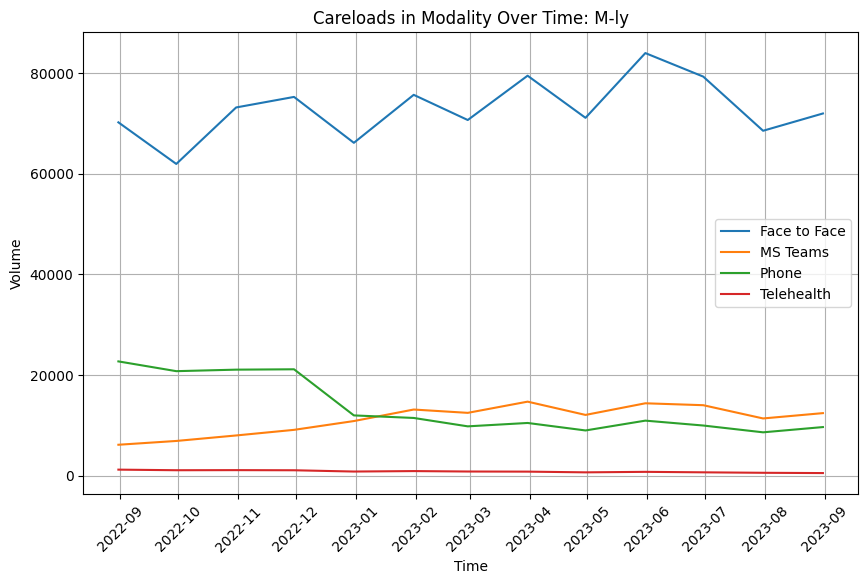

In [27]:
plot_data(valid_data, 'M')

<ipython-input-26-a02c0505174d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  th_data = data.resample(time_horizon).sum().copy()


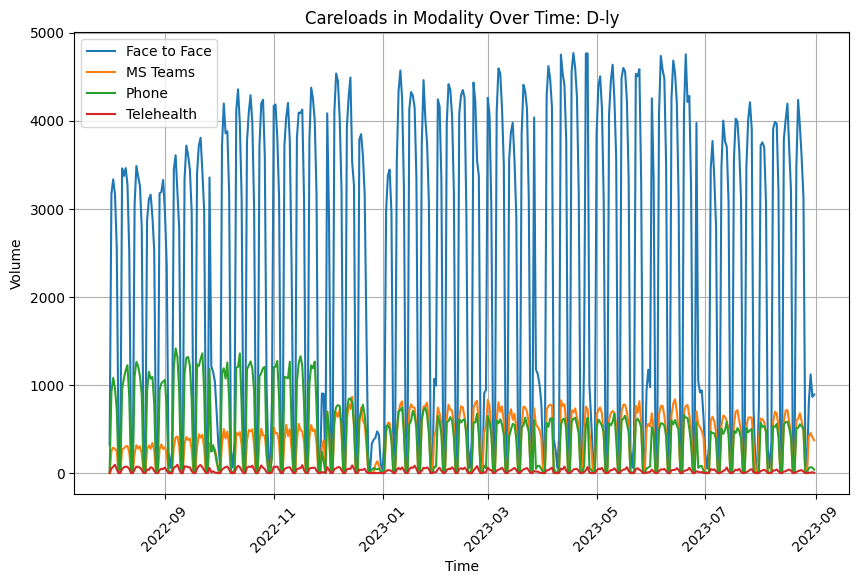

In [28]:
plot_data(valid_data, 'D')

<ipython-input-26-a02c0505174d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  th_data = data.resample(time_horizon).sum().copy()


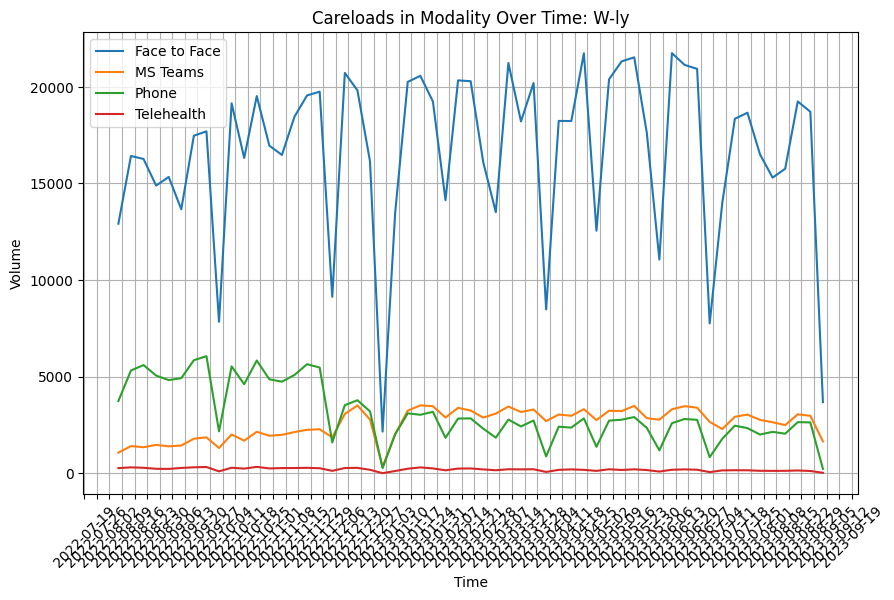

In [29]:
plot_data(valid_data, 'W')

#### Careload Hourly

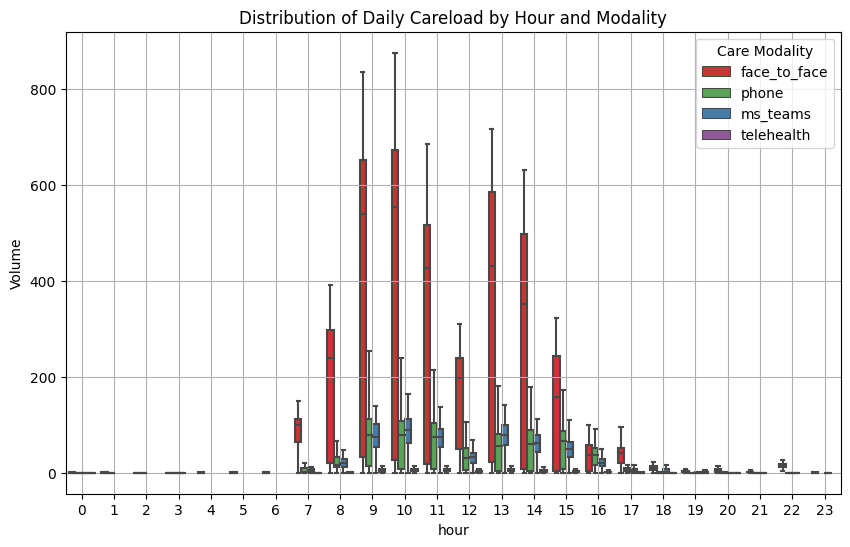

In [42]:
valid_data['hour'] = valid_data.index.hour
valid_data['date'] = valid_data.index.date

# Group by date, hour, and modality, then count the number of appointments
daily_hourly_modality_counts = valid_data.groupby(['date', 'hour', 'care_modality']).size().reset_index(name='careload')

# Get the Set1 palette with 4 colors
palette = sns.color_palette("Set1", n_colors=4)
color_palette = {
    'face_to_face': palette[0],
    'ms_teams': palette[1],
    'phone': palette[2],
    'telehealth': palette[3]
}


# Now create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='hour',
    y='careload',
    hue='care_modality',
    data=daily_hourly_modality_counts,
    showfliers=False,
    palette=color_palette
)
ax.legend(title='Care Modality')
plt.ylabel('Volume')
plt.title('Distribution of Daily Careload by Hour and Modality')
plt.grid(True)
plt.show()


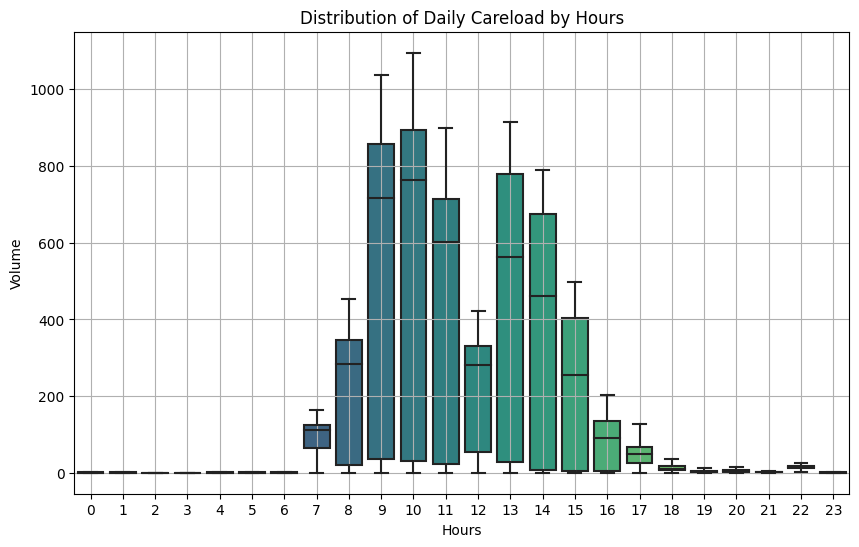

In [31]:
valid_data['hour'] = valid_data.index.hour
valid_data['date'] = valid_data.index.date

# Group by date and hour, and count the number of appointments
hourly_counts = valid_data.groupby(['date', 'hour']).size().reset_index(name='appointment_counts')

plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='appointment_counts', data=hourly_counts, showfliers=False, palette='viridis')
plt.ylabel('Volume')
plt.xlabel('Hours')
plt.title('Distribution of Daily Careload by Hours')
plt.grid(True)
plt.show()

### Patient Perspective

#### Careloads by modalities

#### Careloads over ID

In [32]:
modality_dummies = ['face_to_face', 'ms_teams', 'phone', 'telehealth']
patient_modality_distribution = valid_data.groupby('cleaned_patient_id')[modality_dummies].sum().sort_index()
# modality_distribution.plot()

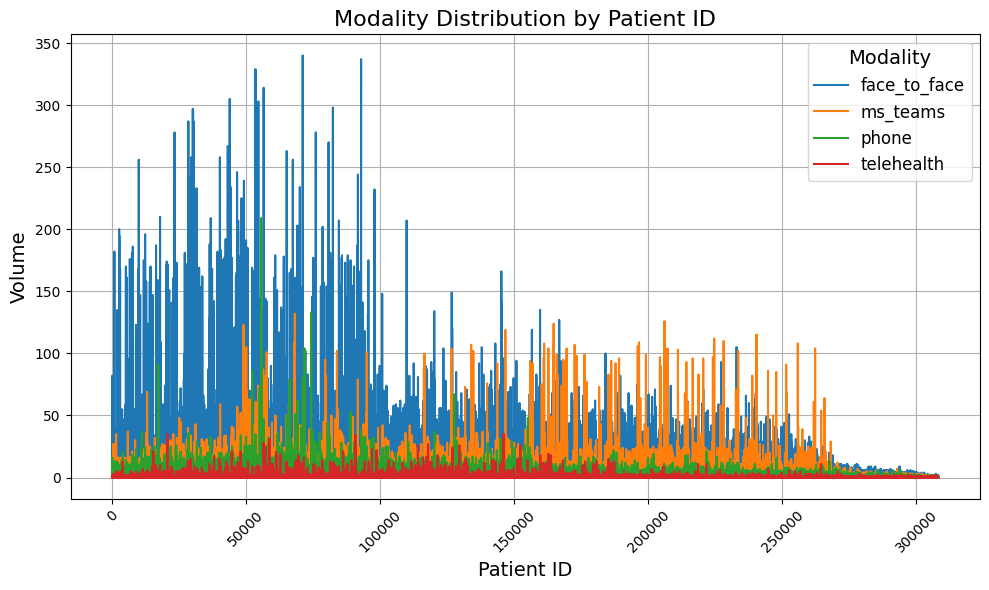

In [33]:
ax = patient_modality_distribution.plot(figsize=(10, 6))
ax.set_title('Modality Distribution by Patient ID', fontsize=16)
ax.set_xlabel('Patient ID', fontsize=14)
ax.set_ylabel('Volume', fontsize=14)
ax.legend(title='Modality', title_fontsize='14', fontsize='12')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Provider Perspective

#### Workload over time

In [34]:
def plot_provider(data, timehorizon):
  th_data = data.resample(timehorizon)['cleaned_provider_id'].nunique()
  ax = th_data.plot(figsize=(10, 6))
  ax.set_title(f'Available Providers {timehorizon}-ly', fontsize=16)
  ax.set_xlabel('Time', fontsize=14)
  ax.set_ylabel('Count', fontsize=14)

  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

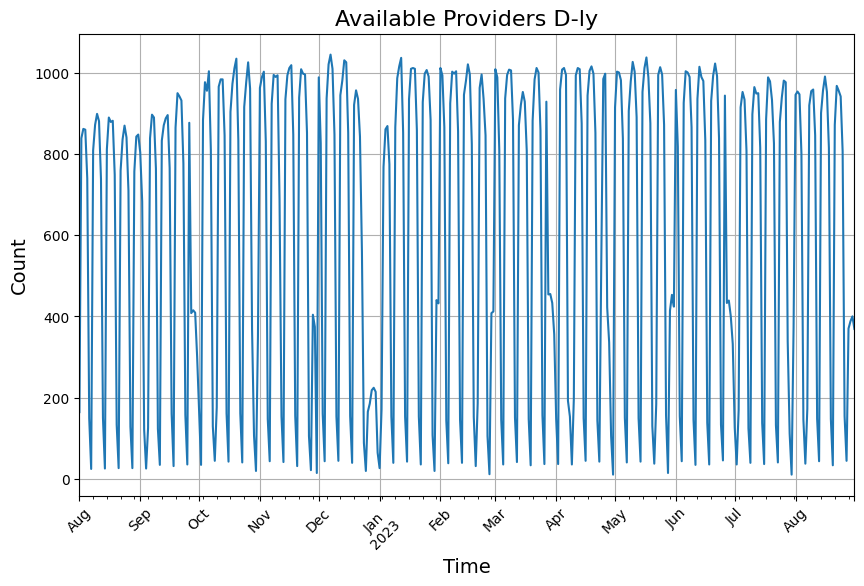

In [35]:
plot_provider(valid_data, 'D')

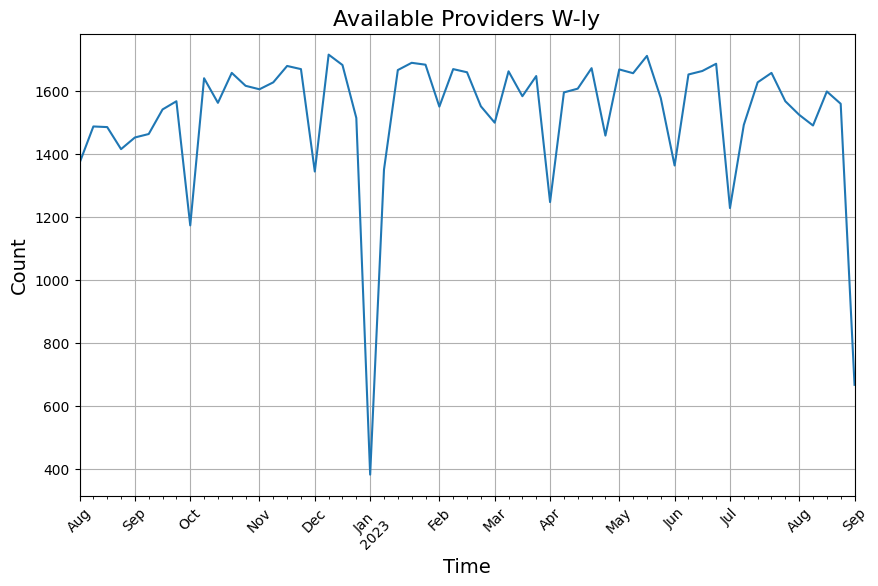

In [36]:
plot_provider(valid_data, 'W')

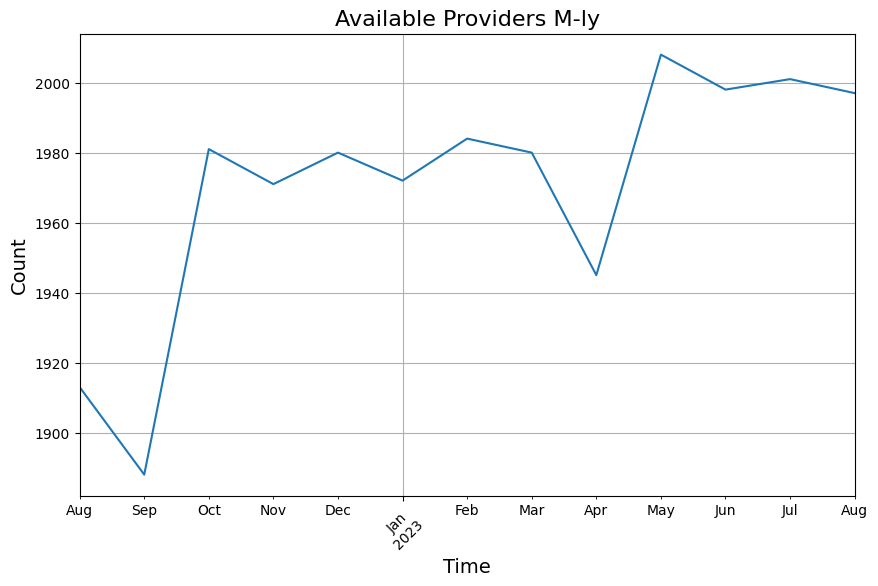

In [37]:
plot_provider(valid_data, 'M')

#### Workload over providers

In [38]:
provider_modality_distribution = valid_data.groupby('cleaned_provider_id')[modality_dummies].sum().sort_index()

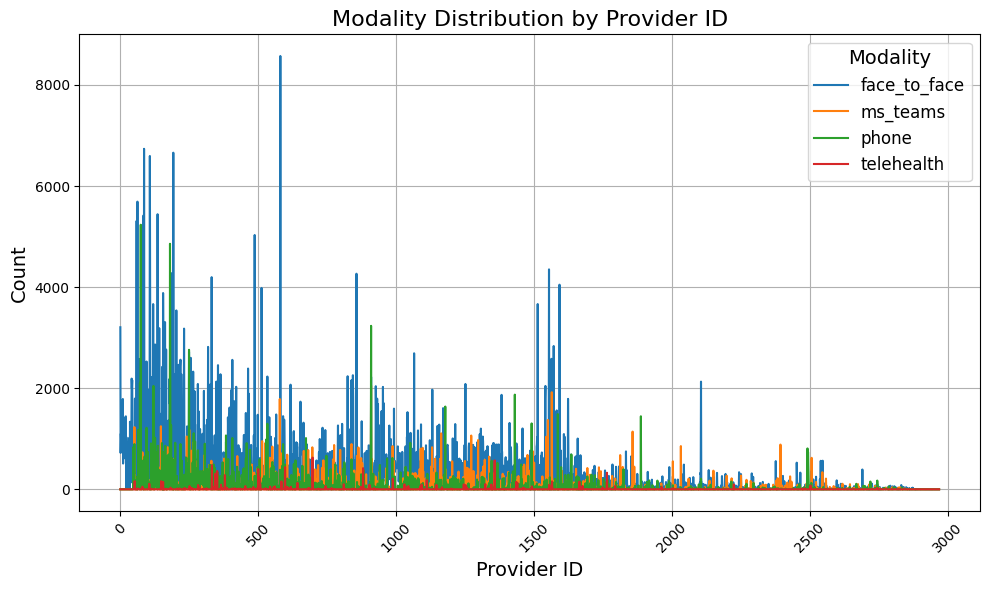

In [39]:
ax = provider_modality_distribution.plot(figsize=(10, 6))
ax.set_title('Modality Distribution by Provider ID', fontsize=16)
ax.set_xlabel('Provider ID', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(title='Modality', title_fontsize='14', fontsize='12')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Location Perspective

In [40]:
location_modality_distribution = valid_data.groupby('cleaned_location_name')[modality_dummies].sum()
# location_modality_distribution.plot()

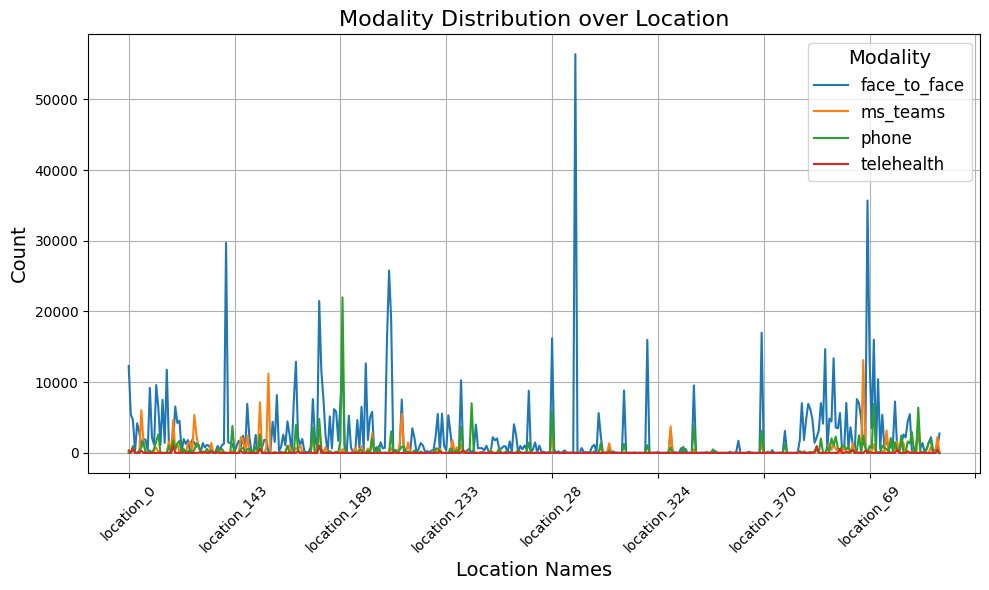

In [41]:
ax = location_modality_distribution.plot(figsize=(10, 6))
ax.set_title('Modality Distribution over Location', fontsize=16)
ax.set_xlabel('Location Names', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(title='Modality', title_fontsize='14', fontsize='12')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()